In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import Mnist dataset with handwritten numbers
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

Dimensions of a single image (28, 28)


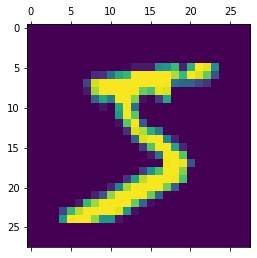

In [8]:
# Look at data in X_train
print("Dimensions of a single image", X_train[0].shape)
plt.matshow(X_train[0])

In [9]:
# Look at y_train
y_train[0]

5

In [11]:
# Scale values
X_train = X_train/255
X_test = X_test/255

In [12]:
# Create a neural network in keras
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # Normalization
    tf.keras.layers.Dense(100, activation = 'relu'), # First hidden layer
    tf.keras.layers.Dense(10, activation = 'sigmoid') # Output layer
])

model.compile(
    optimizer = 'adam', # Optimize method
    loss = 'sparse_categorical_crossentropy', # Loss function
    metrics = ['accuracy'] # Used metrics
)

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2772 - accuracy: 0.9205
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0528 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0416 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0284 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [13]:
# Accuracy on test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9775


[0.08012492954730988, 0.9775000214576721]

In [14]:
# Make predictions
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [15]:
# Create an array with predicted labels (because y_pred contains the probabilities)
y_pred_labels = [np.argmax(i) for i in y_pred]

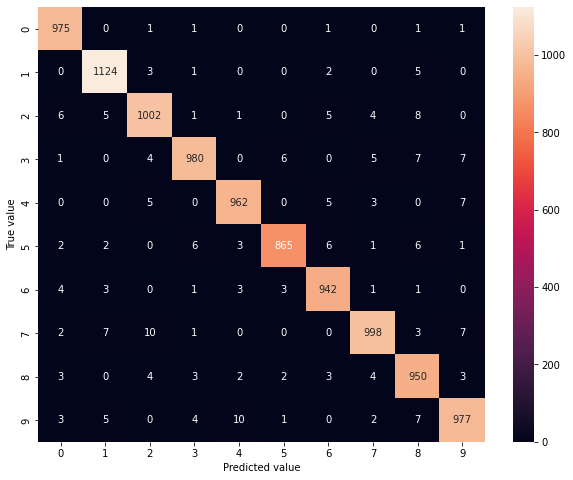

In [18]:
# Confusion Matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted value');
plt.ylabel('True value');